Réaliser une Analyse en Composantes Principales (vous pourrez vous appuyer sur la librairie Scikit-Learn) https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

ou stat model

In [1]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [4]:
# import de l'échantillon
data = pd.read_csv("timesData.csv",decimal=".",index_col=0)

#selection de l'année 2016
data = data[data.year==2016]

#sélection de 50 universitée
data = data.iloc[:50,:]

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_name         50 non-null     object 
 1   country                 50 non-null     object 
 2   teaching                50 non-null     float64
 3   international           50 non-null     object 
 4   research                50 non-null     float64
 5   citations               50 non-null     float64
 6   income                  50 non-null     object 
 7   total_score             50 non-null     object 
 8   num_students            49 non-null     object 
 9   student_staff_ratio     49 non-null     float64
 10  international_students  49 non-null     object 
 11  female_male_ratio       43 non-null     object 
 12  year                    50 non-null     int64  
dtypes: float64(4), int64(1), object(8)
memory usage: 5.5+ KB


In [5]:
#transformation des données non numerique nécessaire en numérique

data.income = pd.to_numeric(data.income, errors='coerce')
data.num_students = [str(each).replace(',', '')for each in data.num_students]
data.num_students =  pd.to_numeric(data.num_students, errors='coerce')
data.total_score = pd.to_numeric(data.total_score, errors='coerce')
data.international = pd.to_numeric(data.international, errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 1 to 50
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   university_name         50 non-null     object 
 1   country                 50 non-null     object 
 2   teaching                50 non-null     float64
 3   international           50 non-null     float64
 4   research                50 non-null     float64
 5   citations               50 non-null     float64
 6   income                  49 non-null     float64
 7   total_score             50 non-null     float64
 8   num_students            49 non-null     float64
 9   student_staff_ratio     49 non-null     float64
 10  international_students  49 non-null     object 
 11  female_male_ratio       43 non-null     object 
 12  year                    50 non-null     int64  
dtypes: float64(8), int64(1), object(4)
memory usage: 5.5+ KB


In [6]:
# choix du nombre de composantes à calculer
n_comp = 8


In [7]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["teaching","research","international","citations","income",'total_score','num_students','student_staff_ratio']]

In [8]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["university_name"] # ou data.index pour avoir les intitulés
features = data.columns

In [9]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [10]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

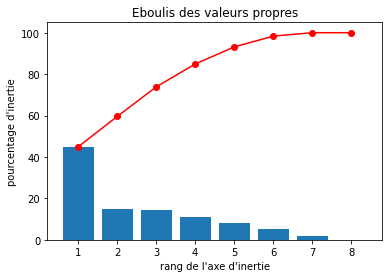

In [11]:
# Eboulis des valeurs propres
display_scree_plot(pca)

#la courbe rouge est le pourcentage cumulé, somme des variances


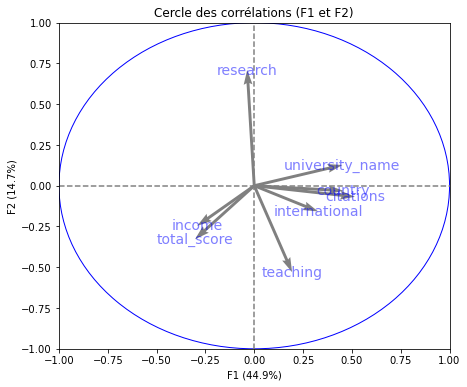

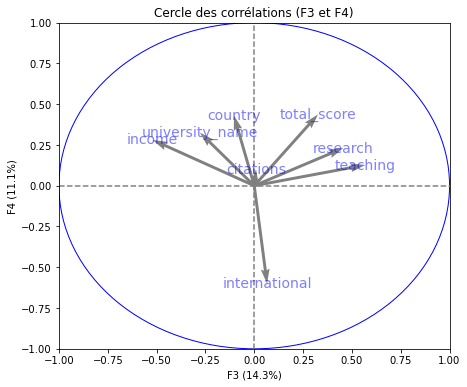

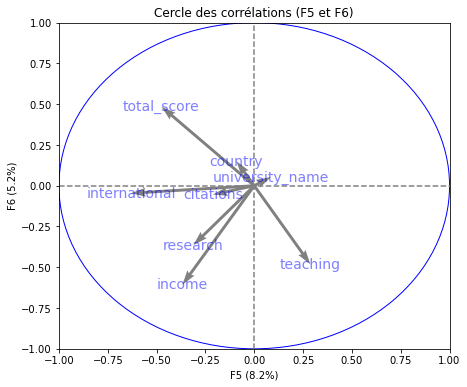

In [12]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

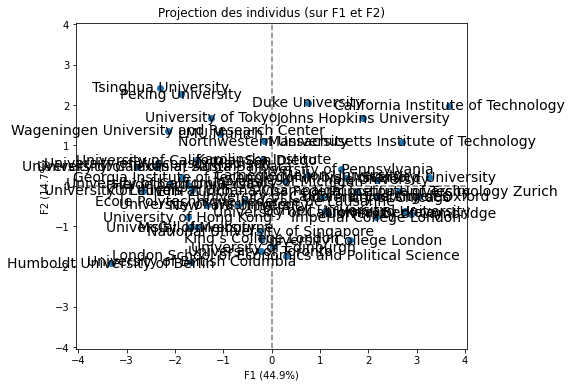

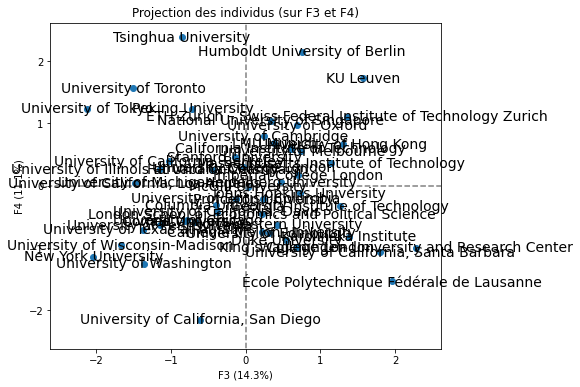

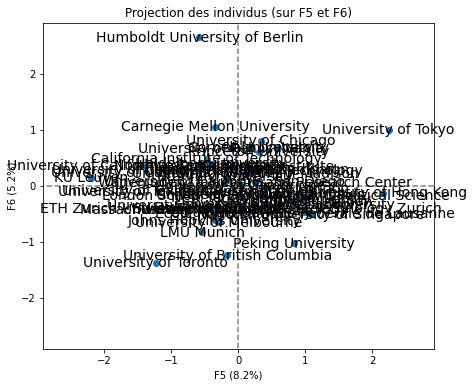

In [13]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))


In [14]:
plt.show()

In [6]:
# Prépare les trames de données (data frame)
from plotly.offline import init_notebook_mode, iplot, plot
import pandas as pd
timesData = pd.read_csv("/home/cecilia/Documents/brief/brief_dash_université/pca/timesData.csv")
df = timesData[timesData.year == 2016].iloc[:50,:]
#df = timesData.iloc[:50,:]
dfValue = timesData
# import graph objects as "go"
import plotly.graph_objs as go

# Création de la trame 1

trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.research,
                    mode = "lines+markers", #markers ce sont les points violet rajouté 
                    name = "recherche",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text = df.university_name)

data = [trace2]
layout = dict(title = 'Recherche comparé au classement mondial des 50 meilleures universités',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [7]:
df2016 = timesData[timesData.year == 2016].iloc[:50,:]
# import graph objects as "go"
import plotly.graph_objs as go


# Création de la trace 3 _ 2016
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = df2016.university_name)
data = [trace3]
layout = dict(title = 'Citation par rapport au classement mondial des 50 meilleures universités, années 2016',
              xaxis = dict(title = 'Rang Mondial',ticklen = 5,zeroline = False),
              yaxis = dict(title = 'Citation',ticklen= 5,zeroline = False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

Text(0, 0.5, 'Moyenne du total score par pays')

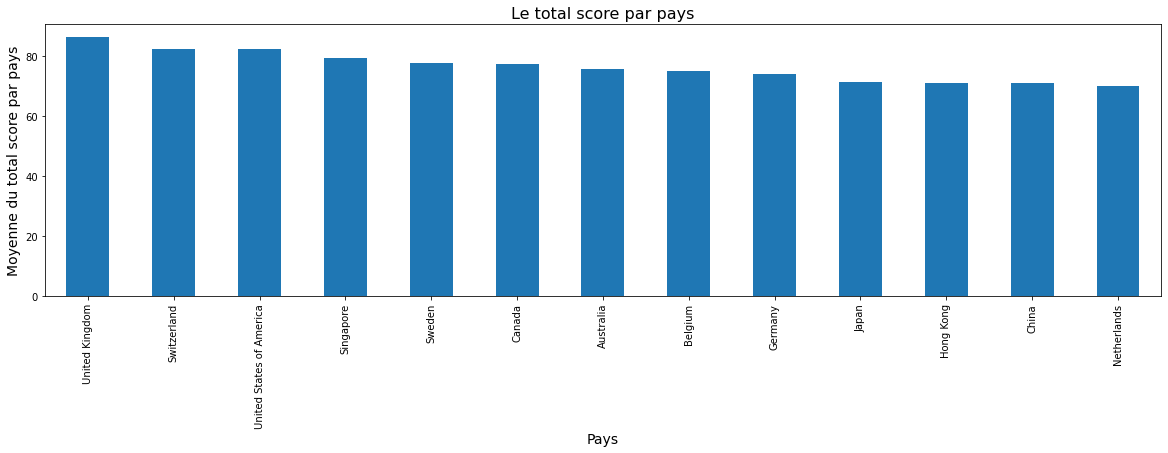

In [18]:
dfValue = timesData[timesData.year == 2016].iloc[:50,:]

dfValue.total_score = pd.to_numeric(dfValue.total_score, errors='coerce')



ax = dfValue.groupby(['country']).total_score.mean().sort_values(ascending=False).plot(kind='bar', figsize = (20,5))
ax.set_xlabel('Pays', fontsize=14)
ax.set_title("Le total score par pays",fontsize=16)
ax.set_ylabel("Moyenne du total score par pays", fontsize=14)

In [20]:
import numpy as np

dfValue = timesData[timesData.year == 2016].iloc[:100,:]
dfValue.total_score = pd.to_numeric(dfValue.total_score, errors='coerce') #transforme en chiffre les données de la colonne income


grouped = dfValue.groupby('country') #groupe les pays
y=grouped['total_score'].agg(np.mean).sort_values(ascending=False) #aggreg la somme des valeurs moyenne de income

trace = go.Bar(
                x = y.index.get_level_values(0).tolist(),
                y = y,
                name = "Le score universitaire pour le transfert de connaissances par pays",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line = dict(color ='rgb(0,0,0)',width =1.5)),
                text = y.index.get_level_values(0).tolist())

layout = go.Layout(barmode = "group")
fig = go.Figure(data = trace, layout = layout)
iplot(fig)
